<a href="https://colab.research.google.com/github/gnbhub/20231_AI_Study/blob/master/week1/week1_janghun.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1장**

머신러닝의 세가지 종류
  1. 지도학습(Supervised Learning)
    - 정답이 있음
    - 입력과 출력을 비교하여 피드백
    - 예측하는 작업
  2. 비지도학습(Unsupervised Learning)
    - 정답이 없음
    - 피드백이 없음
    - 데이터의 패턴을 파악하는 작업
  3. 강화학습(Reinforcement Learning)
    - 결정 과정의 행동 학습
    - 보상 시스템

지도학습
  1. 분류(classification)
    - 이진 분류(2개), 다중 분류(3개 이상)
    - 이진 분류: 양성 클래스, 음성 클래스
    - 결정 경계: 클래스를 구분하는 경계
  2. 회귀(regression)
    - 예측 변수(입력, 특성), 반응 변수(출력, 타깃)
    - 선형 회귀: 직선으로 모델링

강화학습
  - 좋은 보상을 받을 수 있도록 행동을 선택하는 과정을 계속 반복함

비지도학습
  1. 클러스터링(군집화)
    - 비슷한 것들 끼리 모으기
  2. 차원 축소
    - 샘플이 가진 많은 특성을 적은 특성으로 줄이기

기본 용어
  - 특성: 입력
  - 타깃: 원하는 출력
  - 샘플: 데이터 샘플
  - 샘플을 행, 특성은 열로 한 이차원 배열

표기법
  - 벡터 - 굵은 소문자
  - 행렬 - 굵은 대문자
  - 샘플 - 행 벡터
  - 특성 - 열 벡터

머신러닝 용어
  - 훈련 샘플: 하나의 행 벡터
  - 훈련: 모델이 예측할 수 있게 만드는 것
  - 특성: 훈련의 재료로 사용
  - 타깃: 정답
  - 손실 함수(비용 함수): 모델 평가 함수(낮으면 좋음)

전처리(데이터 형태 갖추기)
  - 스케일 조정(단위 맞추기)
  - 차원 축소
  - 훈련 데이터와 테스트 데이터 나누기

예측 모델 훈련과 선택
  - 대표적인 분류 지표: 정확도
  - 하이퍼파라미터(사람이 사전에 지정)
  - 교차 검증 - 하이퍼 파라미터를 바꿔서 검증

모델을 평가
  - 일반화 오차(일반화 성능) - 실전
  - 훈련 데이터셋에서 사용한 전처리 파라미터로 데이터 변환

**2장**

인공 뉴런
  - 퍼셉트론
  - 적응형 선형 뉴런(Adaline)

인공 뉴런의 수학적 정의
  - 입력: z = w^Tx
  - 퍼셉트론의 결정함수: phi(z) = 1 if z - theta(임계값) >= 0 else -1
  - z - theta를 z_new로 표현하면, w_0 = -theta, x_0 = 1으로 하고, z_new = w^Tx
  - 퍼셉트론의 결정함수로 결정경계를 정함
  - w를 어떻게 찾느냐에 따라 결정경계가 달라짐

퍼셉트론 학습 규칙
  - delta w_j(가중치 업데이트 값) = eta(학습률)(y^i(타겟값)-y hat ^i(예측값))x^i_j(입력값)
  - w_j = w_j + delta w_j
  - 정확히 예측할 경우 delta w_j = 0
  - 선형적이지 않은 데이터는 쉽지 않음

In [3]:
import numpy as np

class Perceptron(object): #퍼셉트론 구현
  """
  매개변수
  ----------
  eta : float
    학습률(0.0 ~ 1.0)
  n_iter : int
    훈련 데이터셋의 반복 횟수
  random_state : int
    가중치 무작위 초기화를 위한 난수 생성기 시드
      가중치를 0으로 초기화 하면 방향은 바뀌지 않고 크기만 변하게 됨.
  
  속성
  ----------
  """
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
  
  def fit(self, X, y):
    """훈련 데이터 학습
    매개변수
    ----------
    X : array-like, shape = [n_samples, n_features]
      n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터(이차원 배열)
    y : array-like, shape = [n_samples]
      타깃값(1 or -1)
    """
    rgen = np.random.RandomState(self.random_state) #난수 발생기 초기화
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1]) #난수 발생, 개수는 특성 + 1개(절편이 있기 때문)
    self.errors_ = [] #오차값

    for _ in range(self.n_iter): #n_iter만큼 반복
      errors = 0
      for xi, target in zip(X, y): # xi = X, target = y (튜플)
        update = self.eta * (target - self.predict(xi))
        self.w_[1:] += update * xi #가중치 계산
        self.w_[0] += update #(*1)
        errors += int(update != 0.0) #정확히 맞추지 못했을 때
      self.errors_.append(errors)
    return self
  
  def net_input(self, X):
    return np.dot(X, self.w_[1:] + self.w_[0])

  def predict(self, X):
    return np.where(self.net_input(X) >= 0.0, 1, -1)


In [4]:
#붓꽃 데이터셋
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


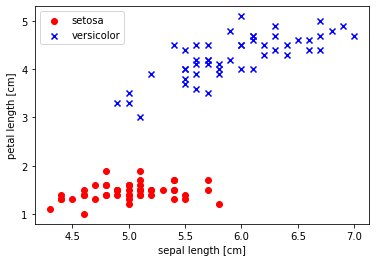

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

y = df.iloc[0:100, 4].values #0~49 : setosa, 50~99 : versicolor
y = np.where(y == 'Iris-setosa', -1, 1) #setosa인 경우 -1, versicolor인 경우 1

X = df.iloc[0:100, [0, 2]].values #sepal과 petal 길이 추출

plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

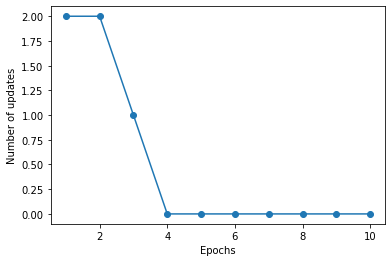

In [6]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
  markers = ('s', 'x', 'o', '^', 'v') #s 사각형, x X표시, o O표시, ^ 삼각형, v 역삼각형
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))]) #y값의 개수만큼큼

  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  #꽃받침 길이 최소/최대보다 조금 더
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  #꽃잎 길이 최소/최대보다 조금 더
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

  Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T) #1차원으로 펼치기
  Z = Z.reshape(xx1.shape) #2차원으로 다시 바꾸기

  plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], 
                  y=X[y == cl, 1],
                  alpha=0.8, 
                  c=colors[idx],
                  marker=markers[idx], 
                  label=cl, 
                  edgecolor='black')

<ipython-input-7-df7a9a87138f>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


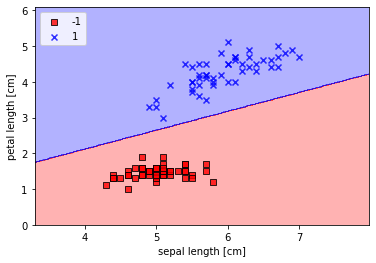

In [8]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

plt.show()

적응형 선형 뉴런(Adaline)
  - 아달린의 활성화함수 phi(z) = z (항등함수)

경사 하강법
  - 목적함수 == 비용함수 == 손실함수
  - 손실함수 : 제곱오차합(SSE)
    - 미분해서 기울기가 작아지는 방향으로 만들어야함
  - 배치 경사 하강법(샘플을 한 번에 모두 사용)
    - J(w) = 1/2 sigma_i (y^i - phi(z^i))^2
    - dJ/dw_j = -sigma(y^i-phi(z^i))x_j^i
    - delta w_j = -eta dJ/dw_j = eta sigma(y^i-phi(z^i))x_j^i (그레디언트)

In [9]:
class AdalineGD(object):
    """적응형 선형 뉴런 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 비용 함수의 제곱합

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : array-like, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # 이 코드의 활성화 함수는 항등 함수(identity function)이기 때문에
            # 아무런 효과가 없습니다.
            # 이 대신 `output = self.net_input(X)`로 바로 쓸 수 있습니다.
            # 이 활성화 함수는 개념적인 목적을 위해 만들었습니다.
            # (잠시 후에 보게 될) 로지스틱 회귀의 경우 이 함수를 시그모이드 함수로 
            # 바꾸어 로지스틱 회귀 분류기를 구현합니다.
            output = self.activation(net_input)
            errors = (y - output) #배열(벡터)
            self.w_[1:] += self.eta * X.T.dot(errors) #eta x X^T x [가중치]
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0 #그래프를 그리기 위한 값
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0] #[샘플x특성]x[가중치]+w[0]

    def activation(self, X):
        """선형 활성화 계산"""
        return X

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

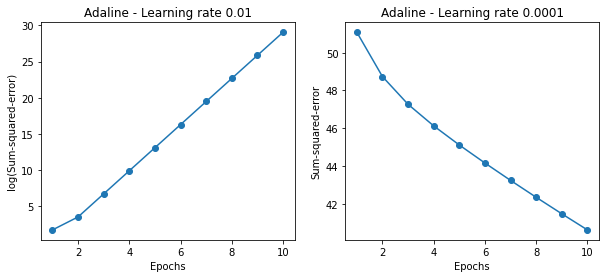

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y) #eta가 너무 크면 발산할 수 있음
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y) #적절한 eta값
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

# plt.savefig('images/02_11.png', dpi=300)
plt.show()

모델 파라미터 - 데이터로부터 학습, 위에서의의 w같은 것

하이퍼 파라미터 - 사람이 지정, 위에서의 eta같은 것

특성의 스케일이 서로 차이가 많이 나면 가중치 업데이트가 공정하게 되지 않기 때문에 스케일을 표준화해야 함

표준화 - x_j' = x_j-mu_j(평균값)/sigma_j(표준편차)

In [11]:
# 특성을 표준화합니다.
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

<ipython-input-7-df7a9a87138f>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


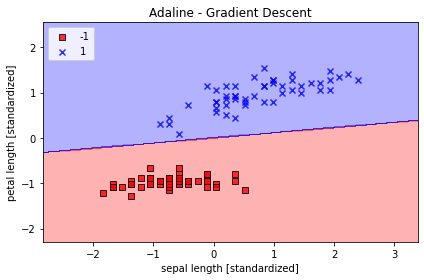

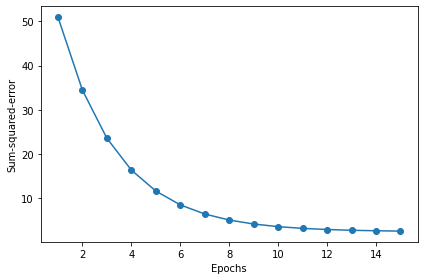

In [13]:
ada_gd = AdalineGD(n_iter=15, eta=0.01) #아까의 학습률이지만 특성이 표준화된 경우
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/02_14_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
# plt.savefig('images/02_14_2.png', dpi=300)
plt.show()

확률적 경사 하강법(샘플을 한 번에 하나만 사용)
  - delta w = eta(y^i)-phi(z^i))x^i

In [14]:
class AdalineSGD(object):
    """ADAptive LInear NEuron 분류기

    Parameters
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    shuffle : bool (default: True)
      True로 설정하면 같은 반복이 되지 않도록 에포크마다 훈련 데이터를 섞습니다
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    Attributes
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      모든 훈련 샘플에 대해 에포크마다 누적된 평균 비용 함수의 제곱합

    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        """훈련 데이터 학습

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃 벡터

        반환값
        -------
        self : object

        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """가중치를 다시 초기화하지 않고 훈련 데이터를 학습합니다"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """훈련 데이터를 섞습니다"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """랜덤한 작은 수로 가중치를 초기화합니다"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """아달린 학습 규칙을 적용하여 가중치를 업데이트합니다"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """선형 활성화 계산"""
        return X

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

<ipython-input-7-df7a9a87138f>:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


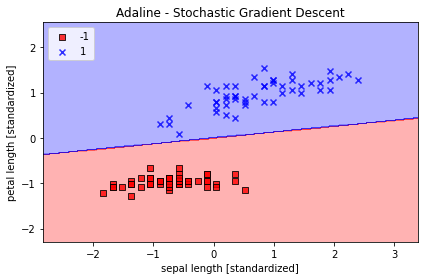

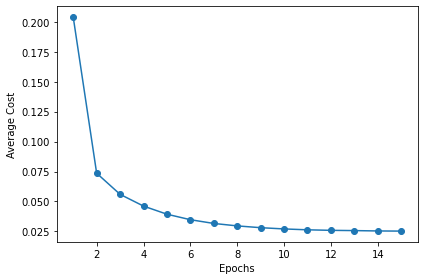

In [15]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/02_15_1.png', dpi=300)
plt.show()

plt.plot(range(1, len(ada_sgd.cost_) + 1), ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
# plt.savefig('images/02_15_2.png', dpi=300)
plt.show()

SGD와 BGD의 절충안 - 미니배치 경사하강법